<a href="https://colab.research.google.com/github/LibirSoft/BTCpredict/blob/main/BTCpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This example makes simple bitcoin predictions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#data loading
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('BTC-USD.csv',date_parser=True)
data.head(7)

Saving BTC-USD.csv to BTC-USD (2).csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0


In [ ]:
data_training=df[data['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [ ]:
data_test=data[data['Date']>'2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
1937,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,2.327626e+10
...,...,...,...,...,...,...,...
2242,2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,15565.880859,3.983784e+10
2243,2020-11-07,15565.880859,15737.095703,14423.203125,14833.753906,14833.753906,3.502495e+10
2244,2020-11-08,14833.753906,15637.320313,14744.110352,15479.567383,15479.567383,2.663208e+10
2245,2020-11-09,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
training_data=data_training.drop(['Date',"Adj Close"],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,26580100.0


In [ ]:
scaler=MinMaxScaler()
training_data=scaler.fit_transform(training_data)
training_data

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        3.35749244e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        6.33453324e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        7.09650970e-04],
       ...,
       [3.70008086e-01, 3.67365217e-01, 3.78051927e-01, 3.74990337e-01,
        4.97548412e-01],
       [3.75325771e-01, 3.64390763e-01, 3.77862744e-01, 3.68279031e-01,
        5.07057851e-01],
       [3.68805505e-01, 3.58377151e-01, 3.72197021e-01, 3.63134123e-01,
        4.69226533e-01]])

In [ ]:
X_train=[]
Y_train=[]

In [ ]:
training_data.shape[0]

1932

In [ ]:
for i in range(60,training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,0])

In [ ]:
X_train,Y_train=np.array(X_train),np.array(Y_train)
X_train.shape

(1872, 60, 5)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor=Sequential()
regressor.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],5)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units=70,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=90,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=140,activation='relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [ ]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 60)            15840     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 70)            36680     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 70)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 90)            57960     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 90)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 140)              

In [ ]:
regressor.compile(optimizer='adam',loss='mean_absolute_error')

In [ ]:
regressor.fit(X_train,Y_train,epochs=20,batch_size=50)

Epoch 1/20
38/38 [==============================] - 9s 239ms/step - loss: 0.0786
Epoch 2/20
38/38 [==============================] - 9s 235ms/step - loss: 0.0320
Epoch 3/20
38/38 [==============================] - 9s 236ms/step - loss: 0.0291
Epoch 4/20
38/38 [==============================] - 9s 235ms/step - loss: 0.0268
Epoch 5/20
38/38 [==============================] - 9s 234ms/step - loss: 0.0259
Epoch 6/20
38/38 [==============================] - 9s 236ms/step - loss: 0.0280
Epoch 7/20
38/38 [==============================] - 9s 236ms/step - loss: 0.0240
Epoch 8/20
38/38 [==============================] - 9s 237ms/step - loss: 0.0234
Epoch 9/20
38/38 [==============================] - 9s 237ms/step - loss: 0.0248
Epoch 10/20
38/38 [==============================] - 9s 238ms/step - loss: 0.0226
Epoch 11/20
38/38 [==============================] - 9s 238ms/step - loss: 0.0242
Epoch 12/20
38/38 [==============================] - 9s 238ms/step - loss: 0.0235
Epoch 13/20
38/38 [======

In [ ]:
past_60_days= data_training.tail(60)
df=past_60_days.append(data_test,ignore_index=True)
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10


In [ ]:
inputs=scaler.transform(df)
inputs

array([[0.4706426 , 0.46111744, 0.48280998, 0.47344448, 0.47088353],
       [0.47401087, 0.46123417, 0.47704822, 0.46881889, 0.4684344 ],
       [0.4693899 , 0.46753509, 0.47971984, 0.47799406, 0.58014293],
       ...,
       [0.75946577, 0.77604168, 0.77503156, 0.79203007, 0.59038287],
       [       nan,        nan,        nan,        nan,        nan],
       [0.78370523, 0.75938763, 0.80144591, 0.77966943, 0.75443129]])

In [ ]:
X_test=[]
Y_test=[]
for i in range (60,inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  Y_test.append(inputs[i,0])

In [ ]:
X_test,Y_test=np.array(X_test),np.array(Y_test)
X_test.shape

(314, 60, 5)

In [ ]:
Y_pred=regressor.predict(X_test)
Y_pred,Y_test 

(array([[0.3459398 ],
        [0.34492967],
        [0.3440113 ],
        [0.34313735],
        [0.3425974 ],
        [0.34305376],
        [0.34574682],
        [0.351308  ],
        [0.3581605 ],
        [0.36541933],
        [0.37217683],
        [0.3776245 ],
        [0.38149652],
        [0.38679406],
        [0.3944174 ],
        [0.40282273],
        [0.41139072],
        [0.4190796 ],
        [0.4253323 ],
        [0.42862245],
        [0.4286164 ],
        [0.42585972],
        [0.4212639 ],
        [0.4154619 ],
        [0.40881965],
        [0.40241638],
        [0.39812335],
        [0.39780062],
        [0.4015712 ],
        [0.40884778],
        [0.4178861 ],
        [0.42664438],
        [0.43434048],
        [0.44053128],
        [0.44462636],
        [0.4476969 ],
        [0.45105684],
        [0.45483693],
        [0.45890588],
        [0.4634016 ],
        [0.46838653],
        [0.47331405],
        [0.4791174 ],
        [0.48648232],
        [0.49389967],
        [0

In [ ]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11])

In [ ]:
scale=1/5.18164146e-05
scale

19298.903787912797

In [ ]:
Y_test=Y_test*scale
Y_pred=Y_pred*scale

In [ ]:
Y_test=Y_test*scale
Y_test

array([7.00511488e+33, 6.78762999e+33, 7.14752155e+33, 7.21240747e+33,
       7.21240796e+33, 7.56959066e+33, 7.96169441e+33, 7.88228758e+33,
       7.67889566e+33, 7.96194903e+33, 7.83339676e+33, 7.98944945e+33,
       7.94075337e+33, 8.62316315e+33, 8.61033844e+33, 8.52332210e+33,
       8.72473350e+33, 8.73892529e+33, 8.50280413e+33, 8.45729694e+33,
       8.54226753e+33, 8.47889280e+33, 8.20461399e+33, 8.23906474e+33,
       8.16357709e+33, 8.39579465e+33, 8.71008894e+33, 9.15373444e+33,
       9.11240152e+33, 9.30413622e+33, 9.14265364e+33, 9.18598947e+33,
       9.14098471e+33, 9.08929447e+33, 8.98018859e+33, 9.41332389e+33,
       9.52118926e+33, 9.58806058e+33, 9.65867774e+33, 9.90960704e+33,
       9.65069821e+33, 9.99618133e+33, 1.01173992e+34, 1.00053176e+34,
       1.01073242e+34, 9.68388898e+33, 9.73113132e+33, 9.48651846e+33,
       9.93776374e+33, 9.42479416e+33, 9.40730248e+33, 9.48300532e+33,
       9.45868795e+33, 9.71619757e+33, 9.44671719e+33, 9.13460985e+33,
      

In [ ]:
Y_pred

array([[ 6676.259 ],
       [ 6656.7646],
       [ 6639.0415],
       [ 6622.175 ],
       [ 6611.7544],
       [ 6620.5615],
       [ 6672.5347],
       [ 6779.8594],
       [ 6912.105 ],
       [ 7052.193 ],
       [ 7182.605 ],
       [ 7287.7393],
       [ 7362.465 ],
       [ 7464.7017],
       [ 7611.8237],
       [ 7774.0376],
       [ 7939.39  ],
       [ 8087.7773],
       [ 8208.447 ],
       [ 8271.943 ],
       [ 8271.827 ],
       [ 8218.626 ],
       [ 8129.9316],
       [ 8017.9595],
       [ 7889.771 ],
       [ 7766.1953],
       [ 7683.3447],
       [ 7677.116 ],
       [ 7749.8843],
       [ 7890.314 ],
       [ 8064.744 ],
       [ 8233.77  ],
       [ 8382.295 ],
       [ 8501.771 ],
       [ 8580.802 ],
       [ 8640.06  ],
       [ 8704.902 ],
       [ 8777.8545],
       [ 8856.381 ],
       [ 8943.143 ],
       [ 9039.347 ],
       [ 9134.442 ],
       [ 9246.44  ],
       [ 9388.576 ],
       [ 9531.723 ],
       [ 9650.372 ],
       [ 9721.933 ],
       [ 9746

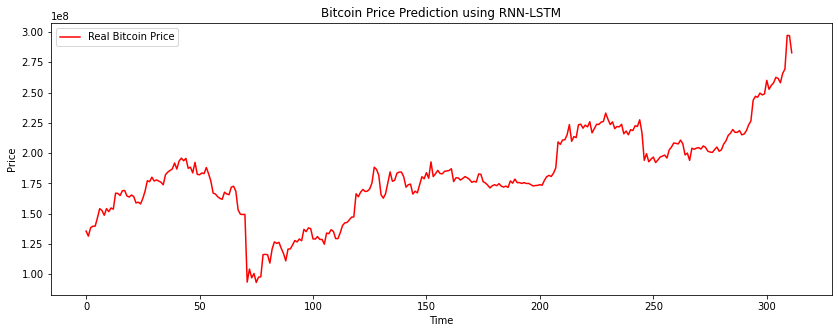

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

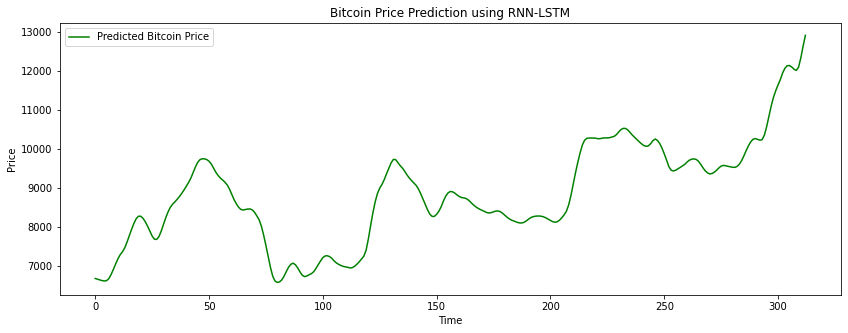

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()